# Medicine Details Analysis

# <a id="index">Table of Contents:</a>  

[Project Overview](#project_overview)<br>
[Dataset Description](#dataset_description)<br>
1. [Data Exploration](#data_exploration)<br>
2. [Data Pre-processing](#data_preprocessing)<br>
    2.1 [Data Cleaning](#data_cleaning)<br>
    2.2 [Feature Engineering](#feature_engineering)<br>
3. [Exploratory Data Analysis (EDA)](#eda)<br>
    3.1 [Descriptive Statistics](#descriptive_statistics)<br>
    3.2 [Distribution Analysis](#distribution_analysis)<br>
    3.3 [Correlation Analysis](#correlation_analysis)<br>
    3.4 [Side Effects Analysis](#side_effects_analysis)<br>
4. [Model Building and Evaluation](#model_building_and_evaluation)<br>
    4.1 [Model Selection](#model_selection)<br>
    4.2 [Random Forest Model](#random_forest_model)<br> 
    4.3 [Feature Importance](#feature_importance)<br>
    4.4 [Gradient Boosting Regressor](#gradient_boosting_regressor)<br>
    4.5 [Neural Network using Keras with TensorFlow](#neural_network_using_keras_with_tensorflow)<br>
    
[Conclusion](#conclusion)<br>

#  <a id="project_overview">Project Overview</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

The pharmaceutical industry faces the challenge of managing vast amounts of data
related to the composition, uses, and side effects of medicines. As the number of
available medications continues to grow, healthcare providers need reliable insights
to prescribe the most effective treatments while minimizing adverse effects.
Additionally, understanding the distribution of medicine usage and patient
satisfaction can help pharmaceutical companies improve their offerings.
    
The objective of the project is to uncover patterns and insights that can help improve decision-making in the healthcare industry and enhance patient outcomes:
- Gain insights into the factors that influence medicine effectiveness and patient satisfaction.
- Identify the most common side effects and their associated medicines.
- Predict user satisfaction ratings with high accuracy using the given features.

#  <a id="dataset_description">Dataset Description</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>
    
The dataset Medicine_Details.csv can be downloaded from Kaggle(https://www.kaggle.com/datasets/singhnavjot2062001/11000-medicine-details)    

The dataset contains a rich repository of information scraped from 1mg, a popular online pharmacy and healthcare platform, covering over 11,000 medicines.
    
Sources:
The dataset was created by scraping data from the 1mg website (www.1mg.com), a popular online pharmacy and healthcare platform in India, providing a wide range of information about medicines, their uses, side effects, manufacturers, user reviews, and more.    
    
The dataset includes 9 columns:
- **Medicine_Name**: Name of the medicine.
- **Salt_Composition**: The active ingredients in the medicine.
- **Uses**: Medical conditions or symptoms the medicine is used to treat.
- **Side_Effects**: Known side effects associated with the medicine.
- **Manufacturer**: Company that manufactures the medicine.
- **Image_URL**: URL to the medicine's image.
- **Review_Excellent**: Percentage of users who rated the medicine as excellent.
- **Review_Average**: Percentage of users who rated the medicine as average.
- **Review_Poor**: Percentage of users who rated the medicine as poor.


# 1. <a id="data_exploration">Data Exploration</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [3]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the dataset
file_path = 'Medicine_Details.csv'
df = pd.read_csv(file_path)

df.head(5)

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [5]:
# Defining custom function to display basic information about the dataset 
# including shape, datatypes, statistics, null values.
def basic_info(df):
    print(f'Shape of this dataset is {df.shape}.')
    print('='*50)
    print(df.info())
    print("="*50)
    print(f'Missing values in any of the columns this dataset are\n{df.isnull().sum(axis=0)}')
    print("="*50)
    print(f'Anomalies in any of the columns this dataset are\n{df.describe(include="all")}')
   
   
# Calling the custom function to display basic_info of dataset   
basic_info(df)

Shape of this dataset is (11825, 9).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB
None
Missing values in any of the columns this dataset are
Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0


### Observations:
**Data shape**: The shape of the dataset is (11825, 9) i.e., 11825 records or observations with 9 features <br>

**Missing Values**: The dataset does not contain any missing values in any of the columns. <br>

**Details**
- **Medicine Name**: There are 11,498 unique medicine names out of 11,825 entries. Some medicines have duplicate entries.
- **Composition**: 3,358 unique compositions are listed. The most common composition is "Luliconazole (1% w/w)," which appears 98 times.
- **Uses**: There are 712 unique uses, with the most frequent being "Treatment of Type 2 diabetes mellitus" (907 occurrences).
- **Side Effects**: There are 1,512 unique side effect descriptions, with the most common being "Application site reactions burning irritation..." (390 occurrences).
- **Image URL**: There are 11,740 unique image URLs. Some images are reused (the most frequent one appears 3 times).
- **Manufacturer**: 759 unique manufacturers are listed, with "Sun Pharmaceutical Industries Ltd" being the most frequent (820 occurrences).
- **Review Percentages (Excellent, Average, Poor)**: Reviews range from 0% to 100%. The data seems consistent, but further checks for logical inconsistencies (e.g., sum of review percentages not equal to 100) should be performed.

# 2. <a id="data_preprocessing">Data Preprocessing</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

## 2.1 <a id="data_cleaning">Data Cleaning</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [6]:
# Droping exact duplicates (where all columns match)
df_cleaned = df.drop_duplicates()
df_cleaned.shape

(11741, 9)

- **Exact Duplicates**: 11825-11741=84 exact duplicates were dropped

In [7]:
# Checking if there are duplicates with different review scores

# Identifying the columns excluding 'Review' columns
review_columns = ['Excellent Review %', 'Average Review %', 'Poor Review %']
non_review_columns = df_cleaned.columns.difference(review_columns)

# Filtering the rows with identical values in all columns except 'Review' columns
filtered_df = df_cleaned[df_cleaned.duplicated(subset=non_review_columns, keep=False)]
filtered_df

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %


- There are no duplicates with different review scores

In [8]:
# Check for logical inconsistencies where the sum of review percentages does not equal 100

# Create a copy of the DataFrame to avoid the warning
df_cleaned = df_cleaned.copy()

# Calculate 'Total Review %' using .loc to avoid SettingWithCopyWarning
df_cleaned.loc[:, 'Total Review %'] = (
    df_cleaned['Excellent Review %'] + 
    df_cleaned['Average Review %'] + 
    df_cleaned['Poor Review %']
)

# Check for logical inconsistencies where the sum of review percentages does not equal 100
logical_inconsistencies = df_cleaned[df_cleaned['Total Review %'] != 100]

print("\nEntries with logical inconsistencies (sum of review percentages not equal to 100):")
print(logical_inconsistencies)


Entries with logical inconsistencies (sum of review percentages not equal to 100):
Empty DataFrame
Columns: [Medicine Name, Composition, Uses, Side_effects, Image URL, Manufacturer, Excellent Review %, Average Review %, Poor Review %, Total Review %]
Index: []


- **Logical Inconsistencies**: There are no rows where the sum of Excellent/Average/Poor Review % does not equal 100.<br>
We can trust the aggregate review data for further analysis

In [9]:
# Cleaning the text data in the columns "Medicine Name," "Uses," and "Side Effects"
# using basic normalization steps:

import re  # Import the regular expressions module
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text_basic(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Apply basic text cleaning to relevant columns
df_cleaned['Medicine Name'] = df_cleaned['Medicine Name'].apply(clean_text_basic)
df_cleaned['Uses'] = df_cleaned['Uses'].apply(clean_text_basic)
df_cleaned['Side_effects'] = df_cleaned['Side_effects'].apply(clean_text_basic)

df_cleaned.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,Total Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer colon rectum Nonsmall cell lung cancer ...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22,100
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,100
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21,100
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment Cough mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35,100
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment Gastroesophageal reflux disease Acid...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29,100


In [10]:
# Saving the cleaned dataset
cleaned_file_path = 'cleaned_Medicine_Details.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

## 2.2 <a id="feature_engineering">Feature Engineering</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [11]:
# Creating new features for further analysis:

# Target variable: 
# Calculating the User Satisfaction Rating (weighted average score)
df_cleaned['User_Satisfaction_Rating'] = (
    (3 * df_cleaned['Excellent Review %'] + 
     2 * df_cleaned['Average Review %'] + 
     1 * df_cleaned['Poor Review %']) / (3 + 2 + 1)
)

# Features:

# 1) Number of active ingredients in Composition
   # each ingredient splited by "+"
df_cleaned['Number_of_Ingredients'] = df_cleaned['Composition'].apply(lambda x: len(x.split('+')))

# 2) Number of reported side effects
    # each occurrence is counted by counting each word starting with a capital letter.
df_cleaned['Number_of_Side_Effects'] = df_cleaned['Side_effects'].apply(lambda x: len([effect for effect in str(x).split() if effect.istitle()]))

# 3) Number of uses

def calculate_number_of_uses(uses):
    # If 'Treatment' or 'Prevention' are present, count them
    if 'Treatment' in uses or 'Prevention' in uses:
        return uses.count('Treatment') + uses.count('Prevention')
    # Otherwise, count words that start with a capital letter
    else:
        return len([word for word in uses.split() if word.istitle()])

df_cleaned['Number_of_Uses'] = df_cleaned['Uses'].apply(calculate_number_of_uses)

# 4) Form of medicine extracted from the Medicine Name column
df_cleaned['Form_of_Medicine'] = df_cleaned['Medicine Name'].apply(lambda x: x.split()[-1] if x.split()[-1].lower() in ['injection', 'tablet', 'syrup', 'capsule', 'cream', 'ointment', 'drops', 'powder', 'gel', 'spray', 'lotion', 'patch'] else 'Other')

# 5) Frequency Encoding of 'Manufacturer'
manufacturer_counts = df_cleaned['Manufacturer'].value_counts()
df_cleaned['Manufacturer_Frequency'] = df_cleaned['Manufacturer'].map(manufacturer_counts)

# 6) Interaction Terms: Creating interaction between Number_of_Ingredients and Number_of_Side_Effects
# to explore if more ingredients lead to more side effects and how this impacts user satisfaction
df_cleaned['Interaction_Ingredients_SideEffects'] = df_cleaned['Number_of_Ingredients'] * df_cleaned['Number_of_Side_Effects']

# 7) Medicine Form Popularity: Calculating the popularity index of each form of medicine
form_popularity = df_cleaned['Form_of_Medicine'].value_counts(normalize=True).to_dict()
df_cleaned['Medicine_Form_Popularity'] = df_cleaned['Form_of_Medicine'].map(form_popularity)

# 8) Ratio of excellent, average, and poor reviews per medicine: Calculating rating distribution for each medicine
# If a medicine has a higher proportion of excellent ratings, it might indicate higher satisfaction.
df_cleaned['Excellent_Review_Ratio'] = df_cleaned['Excellent Review %'] / df_cleaned['Total Review %']
df_cleaned['Average_Review_Ratio'] = df_cleaned['Average Review %'] / df_cleaned['Total Review %']
df_cleaned['Poor_Review_Ratio'] = df_cleaned['Poor Review %'] / df_cleaned['Total Review %']

# 9) Medicine-specific side effect occurrence frequency: 
# counting how often a medicine is associated with severe side effects.
medicine_side_effect_counts = df_cleaned.groupby('Medicine Name')['Number_of_Side_Effects'].sum().to_dict()
df_cleaned['Medicine_Side_Effect_Counts'] = df_cleaned['Medicine Name'].map(medicine_side_effect_counts)

# 10) Interaction Terms: Creating interaction between Medicine_Form_Popularity and Manufacturer_Frequency
df_cleaned['Interaction_Medicine_Form_Manufacturer'] = df_cleaned['Medicine_Form_Popularity'] * df_cleaned['Manufacturer_Frequency']


# Display the updated dataframe with the new features
df_cleaned.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,Total Review %,...,Number_of_Uses,Form_of_Medicine,Manufacturer_Frequency,Interaction_Ingredients_SideEffects,Medicine_Form_Popularity,Excellent_Review_Ratio,Average_Review_Ratio,Poor_Review_Ratio,Medicine_Side_Effect_Counts,Interaction_Medicine_Form_Manufacturer
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer colon rectum Nonsmall cell lung cancer ...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22,100,...,6,Injection,3,9,0.040286,0.22,0.56,0.22,9,0.120859
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,100,...,1,Tablet,68,8,0.496040,0.47,0.35,0.18,4,33.730687
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21,100,...,1,Tablet,166,3,0.496040,0.39,0.40,0.21,3,82.342560
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment Cough mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35,100,...,1,Syrup,208,42,0.025637,0.24,0.41,0.35,14,5.332425
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment Gastroesophageal reflux disease Acid...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29,100,...,2,Tablet,96,3,0.496040,0.34,0.37,0.29,3,47.619794


In [12]:
# Saving the final dataset
final_file_path = 'final_Medicine_Details.csv'
df_cleaned.to_csv(final_file_path, index=False)

# 3. <a id="eda">Exploratory Data Analysis (EDA)</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

## 3.1 <a id="descriptive_statistics">Descriptive Statistics</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [13]:
# Compute basic statistics for categorical variables
categorical_variables = ['Medicine Name', 'Form_of_Medicine', 'Manufacturer']
categorical_stats = df_cleaned[categorical_variables].describe(include="all")
categorical_stats

,Medicine Name,Form_of_Medicine,Manufacturer
count,11741,11741,11741
unique,11496,21,759
top,Lulifin Cream,Tablet,Sun Pharmaceutical Industries Ltd
freq,4,5824,819


### Observations:

- **Medicine Name**: There are 11,496 unique medicine names, indicating that the dataset contains a broad range of different medicines. The most frequent medicine name is "Lulifin Cream," appearing 4 times. This suggests that most medicine names are unique or rarely repeated.     
&nbsp;
- **Form of Medicine**: There are 21 unique forms, such as tablets, injections, syrups, etc., suggesting a diverse range of medicine forms. The most common form is "Tablet," with 5,824 occurrences, indicating that tablets are the predominant form of medicine in the dataset.<br>
&nbsp;
- **Manufacturer**: There are 759 unique manufacturers, showing that the dataset represents products from many different companies. "Sun Pharmaceutical Industries Ltd" is the most common manufacturer, appearing 819 times, suggesting that this company has the most products represented in the dataset.

In [14]:
# Compute basic statistics for numerical variables
numerical_variables = ['User_Satisfaction_Rating', 'Number_of_Ingredients', 
                       'Number_of_Side_Effects', 'Number_of_Uses', 'Manufacturer_Frequency', 
                       'Interaction_Ingredients_SideEffects' ,'Medicine_Form_Popularity',
                       'Excellent_Review_Ratio', 'Average_Review_Ratio', 'Poor_Review_Ratio',
                       'Medicine_Side_Effect_Counts', 'Interaction_Medicine_Form_Manufacturer']
numerical_stats = df_cleaned[numerical_variables].describe()
numerical_stats

,User_Satisfaction_Rating,Number_of_Ingredients,Number_of_Side_Effects,Number_of_Uses,Manufacturer_Frequency,Interaction_Ingredients_SideEffects,Medicine_Form_Popularity,Excellent_Review_Ratio,Average_Review_Ratio,Poor_Review_Ratio,Medicine_Side_Effect_Counts,Interaction_Medicine_Form_Manufacturer
count,11741.000000,11741.000000,11741.000000,11741.000000,11741.000000,11741.000000,11741.000000,11741.000000,11741.000000,11741.000000,11741.000000,11741.000000
mean,35.465605,1.529427,6.918576,1.452943,246.534963,10.516055,0.315832,0.385051,0.357835,0.257114,7.124691,83.991382
std,7.606346,0.769249,4.307200,0.998860,247.717093,8.804890,0.192172,0.251922,0.182640,0.239491,4.491668,108.142250
min,16.666667,1.000000,1.000000,0.000000,1.000000,1.000000,0.000085,0.000000,0.000000,0.000000,1.000000,0.001533
25%,31.333333,1.000000,4.000000,1.000000,31.000000,5.000000,0.076143,0.220000,0.270000,0.000000,4.000000,4.571587
50%,35.500000,1.000000,6.000000,1.000000,162.000000,8.000000,0.240610,0.340000,0.350000,0.220000,6.000000,32.242569
75%,40.333333,2.000000,9.000000,2.000000,336.000000,14.000000,0.496040,0.510000,0.470000,0.350000,10.000000,136.906993
max,50.000000,9.000000,36.000000,8.000000,819.000000,90.000000,0.496040,1.000000,0.880000,1.000000,36.000000,406.256367


### Observations:

**User_Satisfaction_Rating**: Mean of 35.47 and a standard deviation of 7.61. The range (16.67 to 50) suggests that user satisfaction varies considerably, indicating a good spread for predictive modeling.

**Number_of_Ingredients**: Mean of 1.53 and a standard deviation of 0.77, relatively low variance, meaning most medicines have a similar number of ingredients.

**Number_of_Side_Effects**: Mean of 6.92 and a wider range (1 to 36). Given that side effects likely impact user satisfaction negatively, this feature is probably quite predictive. High variance in this feature suggests it can explain part of the variance in the satisfaction ratings.

**Number_of_Uses**: Mean of 1.45, standard deviation of 0.99. The low mean indicates that many medicines are used once or infrequently. 

**Manufacturer_Frequency**: Mean of 246.53 and a wide range (1 to 819). A high frequency might suggest popularity or market trust, potentially influencing satisfaction ratings. 

**Interaction_Ingredients_SideEffects**: Mean of 10.52 and a standard deviation of 8.80. A high interaction value suggests that medicines with more ingredients tend to have more side effects, which could negatively impact user satisfaction. 

**Medicine_Form_Popularity**: Mean is 0.32, with a maximum of 0.50. This suggests that some forms of medicine are more popular than others, potentially influencing satisfaction.

**Excellent_Review_Ratio**: On average, about 38.5% of reviews for each medicine are categorized as "Excellent". A minimum value of 0 indicates that some medicines received no excellent reviews, while the maximum value of 1 shows that some medicines received only excellent reviews.

**Average_Review_Ratio**: On average, around 35.8% of the reviews are categorized as "Average". The maximum value of 0.88 suggests that for some medicines, the majority of reviews are "Average", while others might have no average reviews.

**Poor_Review_Ratio**: On average, around 25.7% of the reviews are categorized as "Poor". A maximum of 1 indicates that some medicines only received poor reviews, while others received none.

**Medicine_Side_Effect_Counts**: On average, each medicine is associated with about 7 side effects.
A minimum of 1 indicates that some medicines have very few side effects, while others have up to 36 side effects.
The high standard deviation of 4.49 suggests that some medicines have significantly more side effects than others.

**Interaction_Medicine_Form_Manufacturer**: Mean: 83.99, Std (Standard Deviation): 108.14. The high mean and large standard deviation indicate that this interaction is highly variable across medicines, with some combinations of medicine forms and manufacturers being far more common than others.

## 3.2 <a id="distribution_analysis">Distribution Analysis</a> <font size='3'>[[Table of contents🔝]](#index)]<font size> 

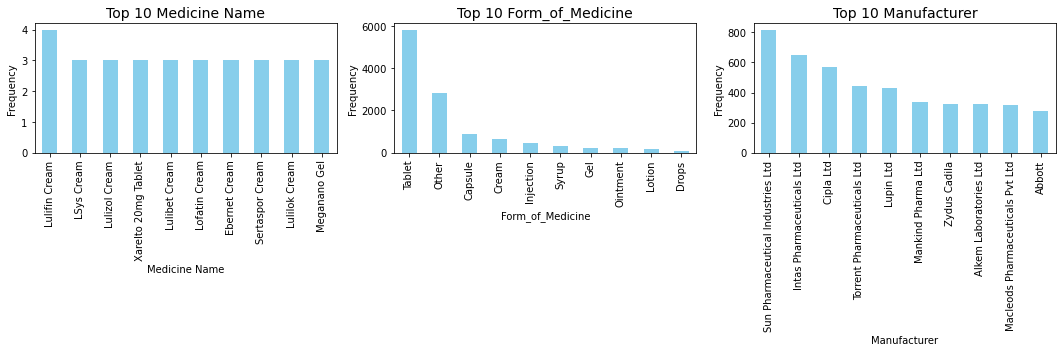

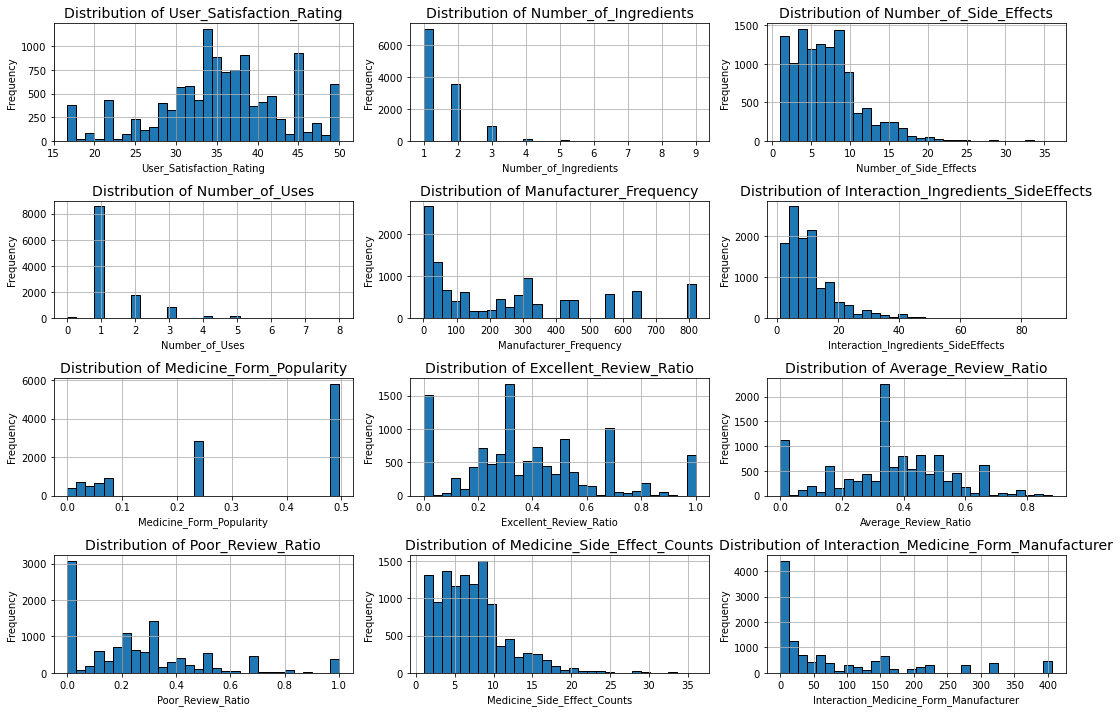

In [15]:
# Prepare the numerical and categorical variables

# Plot bar plots for categorical variables
plt.figure(figsize=(15, 5))
for i, var in enumerate(categorical_variables):
    plt.subplot(1, 3, i + 1)
    df_cleaned[var].value_counts().head(10).plot(kind='bar', color='SkyBlue')
    plt.title(f'Top 10 {var}').set_fontsize('14')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot distribution plots for numerical variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_variables):
    plt.subplot(4, 3, i + 1)
    df_cleaned[var].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {var}').set_fontsize('14')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Observations:

#### Categorical Variables
**Medicine Name**: The most common medicine in the dataset is "Lulifin Cream", appearing 4 times, the low frequency indicates that most medicine names are unique or nearly unique.     
&nbsp;
**Form of Medicine**: The most common form of medicine is "Tablet," with a significantly higher frequency than other forms. This suggests that tablets are the most common form in the dataset.     
&nbsp;
**Manufacturer**: The most common manufacturer is "Sun Pharmaceutical Industries Ltd" with the highest number of medicines (800 products), followed by "Cipla Ltd" and "Cadila Ltd."with around 600-700 products each. This suggests that a few manufacturers have a more extensive product range in the dataset.

#### Target Distribution: 
**User_Satisfaction_Rating**: somewhat normally distributed with a slight skew to the left (lower ratings are less common than higher ratings). The distribution has several peaks, suggesting multiple modes, which could indicate different groups or clusters of user satisfaction levels.
The range of the ratings goes from around 15 to 50, with a concentration between 30 and 45. This spread shows that most users rate their satisfaction in the moderate to high range, which is a good indicator for modeling, as it provides variance in the target variable.

#### Feature Distributions

**Number_of_Ingredients**: The distribution is highly right-skewed, with the majority of medicines containing only 1 ingredient. A small number of medicines have more ingredients (up to 9), suggesting that most medicines in the dataset are simpler formulations.
This skewness might imply that the number of ingredients has a non-linear relationship with satisfaction, or it could suggest that simpler medicines are more common or preferred.

**Number_of_Side_Effects**: This distribution is also right-skewed, with a peak at around 5-10 side effects. 
This feature is likely a strong predictor, as the presence of many side effects could negatively affect user satisfaction.

**Number_of_Uses**: The distribution is also right-skewed, with most medicines having 1-2 uses. The steep drop-off suggests that the majority are specialized for 1 or 2 purposes.

**Manufacturer_Frequency (Top 10 Manufacturer)**: The most common manufacturer is "Sun Pharmaceutical Industries Ltd" with the highest number of medicines (800 products), followed by "Cipla Ltd" and "Cadila Ltd."with around 600-700 products each. This suggests that a few manufacturers have a more extensive product range in the dataset. The frequency with which a manufacturer appears could be an important predictor if users' satisfaction is influenced by brand reputation.

**Interaction_Ingredients_SideEffects**: This distribution is also right-skewed, with most values being relatively low. However, there are some higher values indicating that medicines with a higher number of ingredients and side effects are less common.

**Medicine_Form_Popularity (Top 10 Form_of_Medicines)**: The most common form of medicine is "Tablet," with a significantly higher frequency than other forms. This suggests that tablets are the most common form in the dataset. The popularity of a form might correlate with satisfaction if users prefer certain forms due to convenience, effectiveness, or fewer side effects.

**Excellent_Review_Ratio**: Slightly left-skewed, with many medicines having an excellent review ratio between 0.2 and 0.6.
The skewness suggests that most medicines do not receive overwhelmingly positive reviews. The majority of medicines have a balanced distribution of reviews.

**Distribution of Average_Review_Ratio**: The distribution is roughly normal, centered around 0.4. The distribution is symmetric, meaning that many medicines have an average number of "Average" reviews.

**Distribution of Poor_Review_Ratio**: This distribution is right-skewed, with a large number of medicines having a low poor review ratio (close to 0), it suggests that many medicines are generally well-received, but a notable number of medicines still receive a substantial proportion of poor reviews.

**Distribution of Medicine_Side_Effect_Counts**: The distribution is right-skewed, with the majority of medicines having between 4 and 10 side effects. This feature could be useful for detecting if there's a relationship between the number of side effects and user satisfaction.

**Distribution of Interaction_Medicine_Form_Manufacturer**: The distribution is heavily right-skewed, with the majority of values concentrated between 0 and 100. This interaction term shows that certain medicine forms and manufacturers dominate the dataset, which may suggest popular combinations and could have higher satisfaction ratings.

## 3.3 <a id="correlation_analysis">Correlation Analysis</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>   

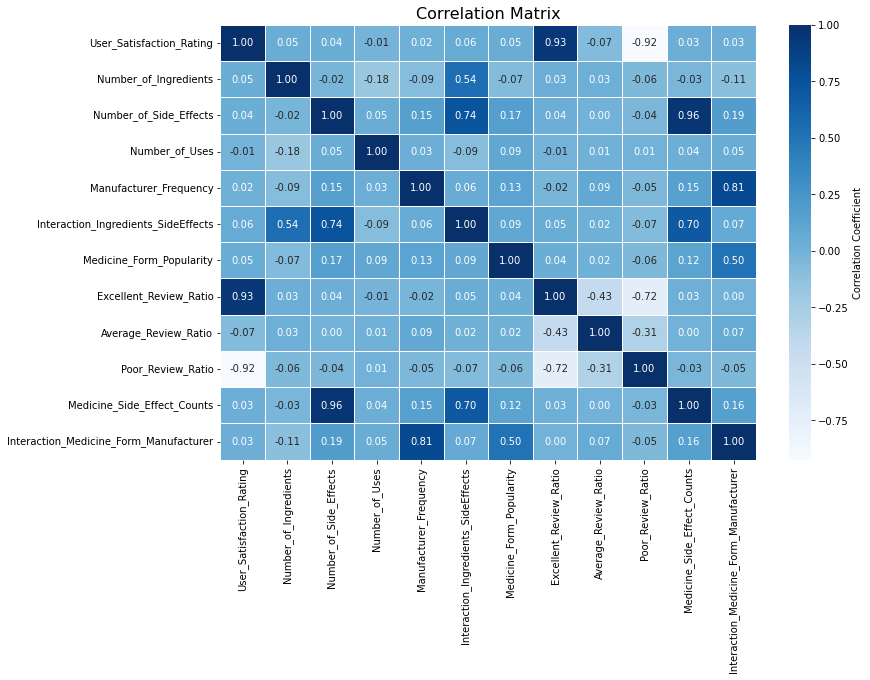

In [16]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
corr_matrix = df_cleaned[numerical_variables].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix').set_fontsize('16') 
plt.show()

### Observations:

**Review-Based Features (e.g., Excellent_Review_Ratio and Poor_Review_Ratio)** are by far the most important predictors of user satisfaction. This suggests that user feedback (in the form of reviews) captures a significant amount of the variation in satisfaction.

**Side Effects and Ingredients**: The weak correlations for the number of ingredients and side effects suggest that these features alone may not be sufficient to predict user satisfaction. You may want to explore more detailed features, such as side effect severity or specific ingredient interactions.

**Weakly Correlated Features**: Features like Number_of_Uses, Manufacturer_Frequency, and Medicine_Form_Popularity exhibit little to no correlation with satisfaction. These features may not contribute much individually to the prediction of satisfaction but could become more important when interacting with other features.### Observations:

## 3.4 <a id="side_effects_analysis">Side Effects Analysis</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [17]:
# Common Side Effects and Associated Medicines

# Identifying side effects by splitting based on spaces followed by a capital letter
side_effects_expanded = df_cleaned[['Medicine Name', 'Side_effects']].copy()
side_effects_expanded['Side_effects_splitted'] = side_effects_expanded['Side_effects'].str.split(r' (?=[A-Z])')
side_effects_expanded = side_effects_expanded.explode('Side_effects_splitted')

# Count the occurrences of each side effect
common_side_effects = side_effects_expanded['Side_effects_splitted'].value_counts().reset_index()
common_side_effects.columns = ['Side_effects_splitted', 'Count']

# Identify the medicines associated with each of the most common side effects
common_side_effects['Medicines'] = common_side_effects['Side_effects_splitted'].apply(
    lambda effect: side_effects_expanded[side_effects_expanded['Side_effects_splitted'] == effect]['Medicine Name'].unique().tolist()
)

# Add the count of medicines associated with each side effect
common_side_effects['Number of Medicines'] = common_side_effects['Medicines'].apply(len)

print(f'Common Side Effects and Associated Medicines\n{common_side_effects.head(10)}')

Common Side Effects and Associated Medicines
  Side_effects_splitted  Count  \
0                Nausea   6170   
1              Headache   5336   
2              Diarrhea   4520   
3             Dizziness   4035   
4              Vomiting   3473   
5        Abdominal pain   1868   
6            Sleepiness   1775   
7          Constipation   1683   
8               Fatigue   1510   
9          Stomach pain   1419   

                                           Medicines  Number of Medicines  
0  [Augmentin 625 Duo Tablet, Azithral 500 Tablet...                 6110  
1  [Avastin 400mg Injection, Ascoril LS Syrup, Ac...                 5286  
2  [Augmentin 625 Duo Tablet, Azithral 500 Tablet...                 4470  
3  [Ascoril LS Syrup, Allegra 120mg Tablet, Alleg...                 4003  
4  [Augmentin 625 Duo Tablet, Ascoril LS Syrup, A...                 3429  
5  [Azithral 500 Tablet, Azee 500 Tablet, Augment...                 1832  
6  [Arkamin Tablet, Alex Junior Syrup, Aptimust 

In [18]:
side_effects_expanded

,Medicine Name,Side_effects,Side_effects_splitted
0,Avastin 400mg Injection,Rectal bleeding Taste change Headache Noseblee...,Rectal bleeding
0,Avastin 400mg Injection,Rectal bleeding Taste change Headache Noseblee...,Taste change
0,Avastin 400mg Injection,Rectal bleeding Taste change Headache Noseblee...,Headache
0,Avastin 400mg Injection,Rectal bleeding Taste change Headache Noseblee...,Nosebleeds
0,Avastin 400mg Injection,Rectal bleeding Taste change Headache Noseblee...,Back pain
...,...,...,...
11822,Zestasil 100 Tablet,Flushing sense warmth face ears neck trunk Hea...,Rash
11822,Zestasil 100 Tablet,Flushing sense warmth face ears neck trunk Hea...,Nasal congestion stuffy nose
11822,Zestasil 100 Tablet,Flushing sense warmth face ears neck trunk Hea...,Dizziness
11822,Zestasil 100 Tablet,Flushing sense warmth face ears neck trunk Hea...,Nausea


### Observations:
The top 5 most common side effects and their associated statistics:
1) **Nausea**: Appears 6,170 times across 6,110 different medicines, including "Augmentin 625 Duo Tablet," "Azithral 500 Tablet," etc. 

2) **Headache**: Appears 5,336 times in 5,286 medicines, such as "Avastin 400mg Injection," "Ascoril LS Syrup," etc.

3) **Diarrhea**: Appears 4,520 times across 4,470 medicines, including "Augmentin 625 Duo Tablet," "Azithral 500 Tablet," etc.

4) **Dizziness**: Appears 4,035 times across 4,003 medicines, including "Ascoril LS Syrup", "Allegra 120mg Tablet" etc.

5) **Vomiting**: Appears 3,473 times across 3,429 medicines, including "Augmentin 625 Duo Tablet", "Ascoril LS Syrup" etc.

In [19]:
df_cleaned.head(5)

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,Total Review %,...,Number_of_Uses,Form_of_Medicine,Manufacturer_Frequency,Interaction_Ingredients_SideEffects,Medicine_Form_Popularity,Excellent_Review_Ratio,Average_Review_Ratio,Poor_Review_Ratio,Medicine_Side_Effect_Counts,Interaction_Medicine_Form_Manufacturer
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer colon rectum Nonsmall cell lung cancer ...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22,100,...,6,Injection,3,9,0.040286,0.22,0.56,0.22,9,0.120859
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,100,...,1,Tablet,68,8,0.496040,0.47,0.35,0.18,4,33.730687
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21,100,...,1,Tablet,166,3,0.496040,0.39,0.40,0.21,3,82.342560
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment Cough mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35,100,...,1,Syrup,208,42,0.025637,0.24,0.41,0.35,14,5.332425
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment Gastroesophageal reflux disease Acid...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29,100,...,2,Tablet,96,3,0.496040,0.34,0.37,0.29,3,47.619794


In [ ]:
# Saving updated dataset
cleaned_file_path = 'cleaned_Medicine_Details.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

# 4. <a id="model_building_and_evaluation">Model Building and Evaluation</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

Predicting user satisfaction ratings using the following features: 

**Target variable**
   - User_Satisfaction_Rating 
   
**Features**
   - Number_of_Ingredients
   - Number_of_Side_Effects
   - Number_of_Uses
   - Manufacturer_Frequency
   - Interaction_Ingredients_SideEffects
   - Medicine_Form_Popularity
   - Excellent_Review_Ratio
   - Medicine_Side_Effect_Counts
   - Interaction_Medicine_Form_Manufacturer

## 4.1 <a id="model_selection">Model Selection</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>   

The dataset contains a mix of numerical features, interaction terms, and non-linear relationships and contains some skewed features (Interaction_Ingredients_SideEffects, Medicine_Side_Effect_Counts)
To align with the characteristics of the dataset were chosen 3 following models:

#### 1. Random Forest
- Captures complex, non-linear relationships between features without needing feature transformations
- Handles of skewed features
- Provides feature importance insights

#### 2) Gradient Boosting Regressor
- Boosted performance over Random Forests
- Handles weak correlations
- Focuses on high accuracy
- Has flexibility in model tuning

#### 3) Neural Networks (Keras with TensorFlow)
- Has capability to model complex non-linear relationships
- Suitable for large feature set
- Flexible - useful when the relationships in the dataset are not straightforward or linear.

## 4.2 <a id="random_forest_model">Random Forest Model</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>   

### Data Preparation for Modeling

In [19]:
# Import Necessary Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = df_cleaned[['Number_of_Ingredients', 'Number_of_Side_Effects', 'Number_of_Uses', 
                'Manufacturer_Frequency', 'Interaction_Ingredients_SideEffects', 
                'Medicine_Form_Popularity', 'Excellent_Review_Ratio', 
                'Interaction_Medicine_Form_Manufacturer']]

y = df_cleaned['User_Satisfaction_Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Random Forest Regressor

In [20]:
# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Predict and Evaluate Model Performance

In [21]:
# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest Regressor Mean Squared Error (MSE): {mse:.2f}')
print(f'Random Forest Regressor R-squared (R²): {r2:.2f}')

Random Forest Regressor Mean Squared Error (MSE): 6.97
Random Forest Regressor R-squared (R²): 0.88


### Observations:

**Mean Squared Error (MSE): 6.97:** It indicates that, on average, the squared difference between the predicted and actual values of User_Satisfaction_Rating is relatively small. This suggests that the model is making fairly accurate predictions.

**R-squared (R²): 0.88:** The model explains 88% of the variance in the target variable (User_Satisfaction_Rating). This is a strong result, indicating that the Random Forest model is doing a good job of capturing the underlying patterns in the data.

## 4.3 <a id="feature_importance">Feature Importance</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>   

Feature ranking:
1. Feature Excellent_Review_Ratio (0.9051)
2. Feature Interaction_Medicine_Form_Manufacturer (0.0262)
3. Feature Manufacturer_Frequency (0.0221)
4. Feature Interaction_Ingredients_SideEffects (0.0153)
5. Feature Number_of_Side_Effects (0.0131)
6. Feature Number_of_Uses (0.0082)
7. Feature Medicine_Form_Popularity (0.0059)
8. Feature Number_of_Ingredients (0.0039)


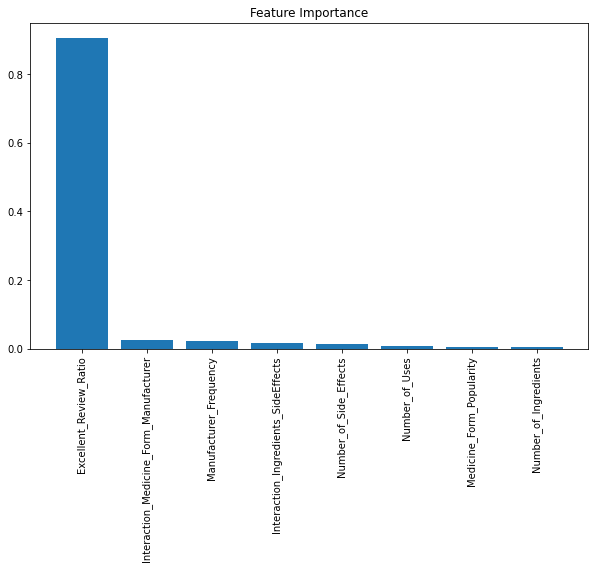

In [22]:
# Get feature importance
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. Feature {X.columns[indices[i]]} ({importances[indices[i]]:.4f})")

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.show()


### Observations:

**Excellent_Review_Ratio (0.9051)**: the most important predictor of User_Satisfaction_Rating. This makes sense, as a higher ratio of excellent reviews is highly correlated with higher user satisfaction.

**Interaction_Medicine_Form_Manufacturer (0.0262)**: comes in second, but with a much smaller importance score. It still contributes to the model, indicating that certain combinations may affect user satisfaction.

**Manufacturer_Frequency (0.0221)**: The frequency with which a manufacturer appears in the dataset has a modest influence on the prediction, suggesting that brand reputation or recognition may have a small impact on satisfaction.

**Interaction_Ingredients_SideEffects (0.0153)**: The interaction between ingredients and side effects has some influence, indicating that how ingredients and side effects interact may affect user satisfaction.

**Number_of_Side_Effects (0.0131)**: The number of side effects has a small but noticeable impact on satisfaction, which aligns with the intuition that more side effects might reduce satisfaction.

**Other Features**:
Number_of_Uses (0.0082), Medicine_Form_Popularity (0.0059), and Number_of_Ingredients (0.0039) contribute very little to the model, indicating that these features don't have much predictive power for user satisfaction.

## 4.4 <a id="gradient_boosting_regressor">Gradient Boosting Regressor</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>  

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate model performance
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting Regressor Mean Squared Error (MSE): {mse_gbr:.2f}')
print(f'Gradient Boosting Regressor R-squared (R²): {r2_gbr:.2f}')

Gradient Boosting Regressor Mean Squared Error (MSE): 5.88
Gradient Boosting Regressor R-squared (R²): 0.90


## 4.5 <a id="neural_network_using_keras_with_tensorflow">Neural Network using Keras with TensorFlow</a> <font size='3'>[[Table of contents🔝]](#index)]<font size> 

In [26]:
# Build the Neural Network model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape=(X_train_scaled.shape[1],), activation='relu')) # Input layer with 100 neurons

model.add(tf.keras.layers.Dense(50, activation='relu'))  # Hidden layer with 50 neurons
model.add(tf.keras.layers.Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

# Predict on the test set
y_pred_keras = model.predict(X_test_scaled)

# Evaluate model performance
mse_keras = mean_squared_error(y_test, y_pred_keras)
r2_keras = r2_score(y_test, y_pred_keras)

print(f'Neural Network (Keras) Mean Squared Error (MSE): {mse_keras:.2f}')
print(f'Neural Network (Keras) R-squared (R²): {r2_keras:.2f}')

C:\Users\dell\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network (Keras) Mean Squared Error (MSE): 6.51
Neural Network (Keras) R-squared (R²): 0.89


## 4.6. <a id="model_evaluation">Model Evaluation</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

### Performance Metrics

<div align="left">

| Model | Mean Squared Error (MSE) | R-squared (R²) |
|:------|:-------------------------|:---------------|
| Random Forest Regressor | 6.97 | 0.88 |
| Gradient Boosting Regressor | 5.88 | 0.90 |
| Neural Network (Keras) | 6.51 | 0.89 |

</div>

### Model Comparison

#### Random Forest Regressor:
- Mean Squared Error (MSE): 6.97
- R-squared (R²): 0.88

Random Forest performs well with an R² of 0.88, indicating that it explains 88% of the variance in user satisfaction.

#### Gradient Boosting Regressor:
- Mean Squared Error (MSE): 5.88
- R-squared (R²): 0.90

Gradient Boosting performs slightly better than Random Forest, with a lower MSE and a higher R², explaining 90% of the variance in user satisfaction. This shows that Gradient Boosting can capture slightly more complex relationships in the data.

#### Neural Network (Keras):
- Mean Squared Error (MSE): 6.44
- R-squared (R²): 0.89

The Neural Network performs quite well, with an R² of 0.89 and an MSE of 6.51. It's comparable to Random Forest and Gradient Boosting, but does not outperform Gradient Boosting.

# <a id="conclusion">Conclusion</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

### Exploratory Data Analysis
- Tablets are the most common form of medicine
- Sun Pharmaceutical Industries Ltd is the top manufacturer
- User satisfaction ratings are normally distributed with a slight left skew
- Most medicines have 1-2 ingredients and 1-2 uses
### Side Effects Analysis
- Top 5 most common side effects: Nausea, Headache, Diarrhea, Dizziness, Vomiting
### Modeling Results
- Three models tested: Random Forest, Gradient Boosting, and Neural Network
- Gradient Boosting performed best with R² of 0.90
- All models explained at least 88% of variance in user satisfaction
### Feature Importance
- Excellent_Review_Ratio was the most important predictor
- Interaction between medicine form and manufacturer was second most important
- Number of side effects had a small but noticeable impact on satisfaction
### Practical Implications: 
- User reviews are crucial in predicting satisfaction
- Combination of medicine form and manufacturer influences user satisfaction
- Number of side effects impacts user satisfaction, but less than expected
### Future Directions: 
- Exploring more detailed features like side effect severity or specific ingredient interactions
Investigating why some features (e.g., Number_of_Uses) showed weak correlations with satisfaction